In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


## Loading the Training Data

In [2]:
np.random.seed(306) 

In [3]:
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

In [4]:
data.shape

(175000, 17)

**We have one lakh seventy five thousand entries having seventeen features**

In [5]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [6]:
data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00
174999,1,2023-06-30 21:26:43,2023-06-30 22:54:42,1.0,1.01,1.0,N,153,72,Credit Card,1.0,6.541699,0.0,1.0,16.32,2.5,0.00


## Data Exploring

**The columns 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' are of object types. So we are converting both the columns to datetime objects.**

In [7]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

**From the data we observe that some rows have pickup time later than dropoff time.So we exchange the values which are contradictory**

In [8]:
# swapping values if pickup datetime is later than dropoff datetime
mask = data['tpep_pickup_datetime'] > data['tpep_dropoff_datetime']
data.loc[mask,['tpep_pickup_datetime','tpep_dropoff_datetime']] = data.loc[mask,['tpep_dropoff_datetime','tpep_pickup_datetime']].values

**From the above two timestamp columns we can calculate duration of trip and many features like pickup hour, pickup time and pickup day of week**


In [9]:
# Calculating trip duration
data['trip_duration'] = (data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']).dt.total_seconds()

# Extracting pickup_hour from pickup timestamp column.
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

# Extracting pickup_dayofweek from pickup timestamp column.
data['pickup_dayofweek'] = data['tpep_pickup_datetime'].dt.weekday

In [10]:
data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration,pickup_hour,pickup_dayofweek
count,175000.000000,175000,175000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000,175000.000000,175000.000000,175000.000000
mean,0.728377,2023-06-29 19:55:21.406788608,2023-06-29 20:39:55.612571648,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825,2674.205783,15.122017,3.179189
min,0.000000,2023-06-28 15:26:39,2023-06-28 15:32:43,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000,0.000000,0.000000,2.000000
25%,0.000000,2023-06-29 08:05:44.750000128,2023-06-29 08:49:44.500000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000,1068.000000,11.000000,3.000000
50%,1.000000,2023-06-29 18:49:12,2023-06-29 19:34:35,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000,2276.000000,16.000000,3.000000
75%,1.000000,2023-06-30 12:19:54.249999872,2023-06-30 13:05:20.249999872,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000,3855.000000,19.000000,4.000000
max,2.000000,2023-07-01 00:49:48,2023-07-01 23:10:43,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000,92229.000000,23.000000,5.000000
std,0.445606,NaN,NaN,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968,2820.883791,5.627547,0.743258


**From the description of the data we observe the following points**
* We have two time stamp columns
* Two Location id columns having the location id's ranging from 1 to 264.
* passenger count is having values from 0 to 9. Null values are present in this column.
* Ratecode ID are also present in this column. The discrete values in this column are [1,2,3,4,5,99].
* Another columns having null values are congestion and airport surcharges.
* Store and forward flag and payment type are the categorical columns . 
* All other columns are self explanatory and are good to preprocess.

### Distribution of vendor ID's

In [11]:
data['VendorID'].value_counts()

VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64

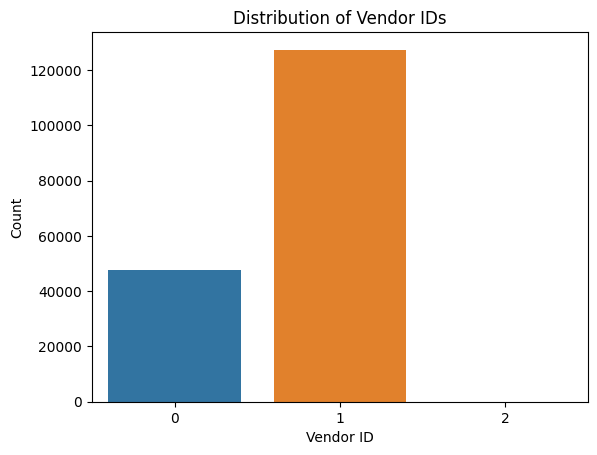

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot(x='VendorID', data=data)
plt.title('Distribution of Vendor IDs')
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

There are only 63 entries with vendor id value equal to 2. Hence in the plot the bar for 2 is showing neglible compared to the scales.

### Trends in Pickup times of taxis.

In [13]:
time_bins = [0,6,12,17,19,24] 
time_labels = ['Early Morning','Morning','Afternoon','Evening','Night']

In [14]:
# Creating a new column with time categories
data['time_of_day'] = pd.cut(data['pickup_hour'],bins = time_bins , labels = time_labels, include_lowest = True)

In [15]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration,pickup_hour,pickup_dayofweek,time_of_day
0,1,2023-06-28 16:34:45,2023-06-28 17:20:21,1.0,2.14,1.0,N,120,9,Credit Card,...,7.165589,0.0,1.0,20.64,2.5,0.0,2736.0,16,2,Afternoon
1,0,2023-06-29 22:01:35,2023-06-29 23:05:01,1.0,2.70,1.0,N,15,215,Credit Card,...,6.067401,0.0,1.0,25.55,2.5,0.0,3806.0,22,3,Night
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,4.111547,0.0,1.0,17.64,2.5,0.0,3219.0,10,4,Morning
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,6.411079,0.0,1.0,12.80,2.5,0.0,3412.0,13,3,Afternoon
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,4.769377,0.0,1.0,18.00,2.5,0.0,1130.0,22,3,Night


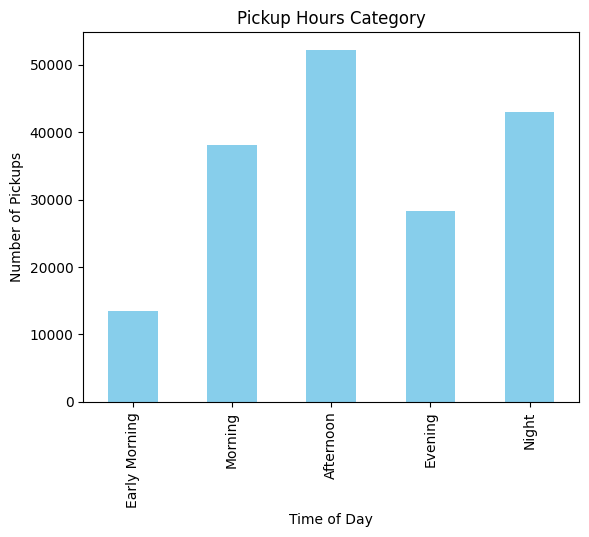

In [16]:
# Count of the occurrences of each time category
time_counts = data['time_of_day'].value_counts()
time_counts = time_counts.reindex(time_labels)
time_counts.plot(kind = 'bar' , color = 'skyblue')
plt.title('Pickup Hours Category')
plt.xlabel('Time of Day')
plt.ylabel('Number of Pickups')
plt.show()

### Day-wise Analysis of taxi pickups.

In [17]:
weekday_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data['day_of_week'] = data['pickup_dayofweek'].map(lambda x: weekday_names[x])

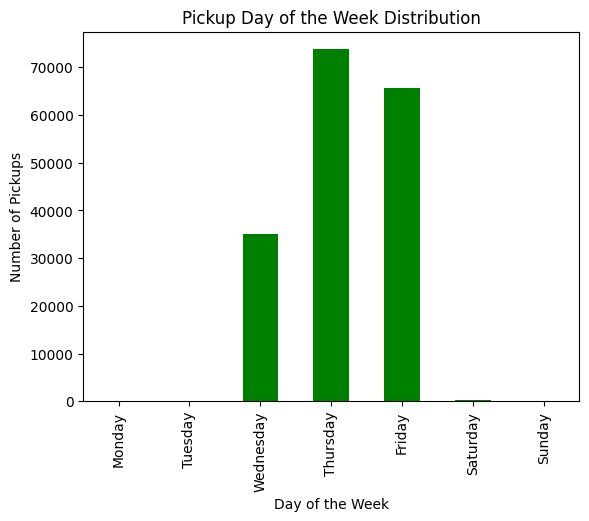

In [18]:
day_of_week_counts = data['day_of_week'].value_counts()
day_of_week_counts = day_of_week_counts.reindex(weekday_names)
day_of_week_counts.plot(kind = 'bar' , color='green')
plt.title('Pickup Day of the Week Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

In [19]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration,pickup_hour,pickup_dayofweek,time_of_day,day_of_week
0,1,2023-06-28 16:34:45,2023-06-28 17:20:21,1.0,2.14,1.0,N,120,9,Credit Card,...,0.0,1.0,20.64,2.5,0.0,2736.0,16,2,Afternoon,Wednesday
1,0,2023-06-29 22:01:35,2023-06-29 23:05:01,1.0,2.70,1.0,N,15,215,Credit Card,...,0.0,1.0,25.55,2.5,0.0,3806.0,22,3,Night,Thursday
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,0.0,1.0,17.64,2.5,0.0,3219.0,10,4,Morning,Friday
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,0.0,1.0,12.80,2.5,0.0,3412.0,13,3,Afternoon,Thursday
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,0.0,1.0,18.00,2.5,0.0,1130.0,22,3,Night,Thursday


## Distribution of Passenger Counts.

Text(0.5, 1.0, 'Distribution of Passenger Counts')

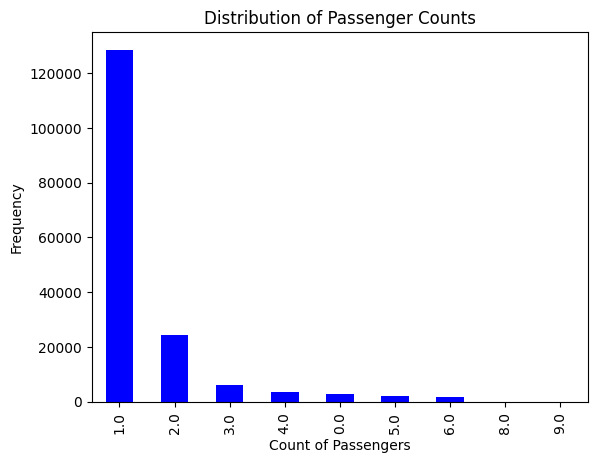

In [20]:
passenger_count = data['passenger_count'].value_counts()
passenger_count.plot(kind = 'bar', color = 'blue')
plt.xlabel('Count of Passengers')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Counts') 

## Bivariate Analysis

**we sample a subset of the dataset to get a representative view of the data. This subset can be used for initial exploration and visualization without dealing with the entire dataset.This subset enables us to understand features and their relationship among themselves and with output label.** 

In [21]:
exploration_set = data.copy()
exploration_set = exploration_set.sample(n=5000, random_state=42).copy()  

(0.0, 70.0)

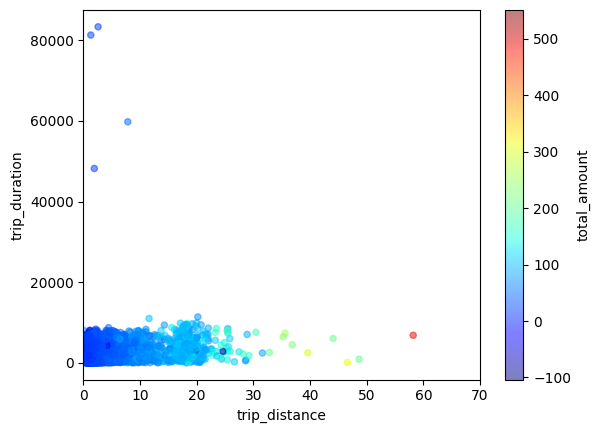

In [22]:
exploration_set.plot(kind='scatter', x='trip_distance', y='trip_duration', alpha=0.5,
                     c="total_amount", cmap=plt.get_cmap("jet"))
plt.xlim(0,70) 

* Ideally the trip duration should increase with increase in distance. But here there are some outliers.

### Creating the Correlation Matrix

In [23]:
numerical_cols = ['passenger_count' , 'trip_distance' ,'extra' , 'tolls_amount' , 'improvement_surcharge' , 'congestion_surcharge' , 'Airport_fee','pickup_hour','trip_duration','pickup_dayofweek','total_amount']

In [24]:
corr_matrix = exploration_set[numerical_cols].corr() 

Let's check features that are correlated with the label, which is `total_amount`

In [25]:
corr_matrix['total_amount']

passenger_count          0.063397
trip_distance            0.895664
extra                    0.216159
tolls_amount             0.663084
improvement_surcharge    0.207518
congestion_surcharge    -0.195111
Airport_fee              0.564260
pickup_hour             -0.015427
trip_duration            0.124149
pickup_dayofweek         0.003670
total_amount             1.000000
Name: total_amount, dtype: float64

**We observe that `total_amount` has strong positive correlation with `trip_distance`(0.89)**

**The impact of `Airport_fee`(0.56) and `tolls_amount`(0.66) is also significant on the fare.**

### Lets visualize the correlation matrix of features correlating with fare amount.

<Axes: >

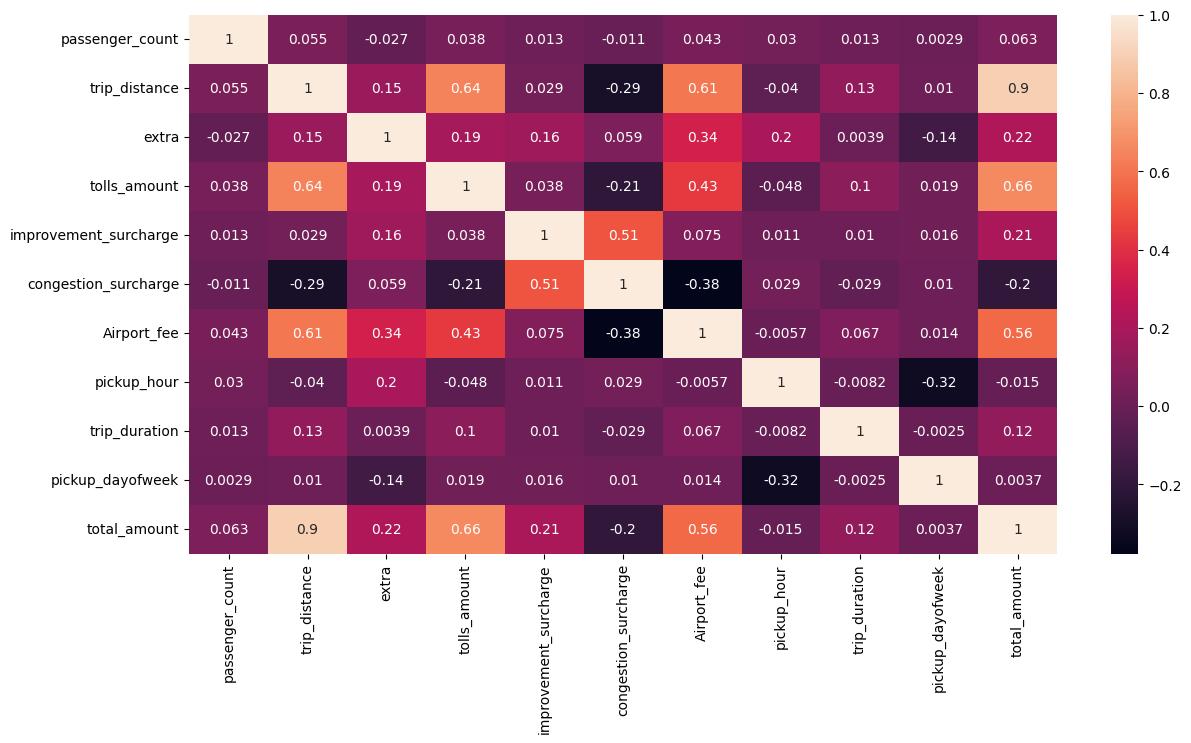

In [26]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

* Here we observe that the fainter colors represent positive correlation. The intensity of the colours depend upon the magnitude of the correlation.
* Also the darker colour represents the negative correlation.
* `trip_distance` and `total_amount` are positively correlated whereas `Airport_fee` and `comgestion_surcharge` are somewhat negatively correlated.

### Visualizing the Relationship between the Trip Distance and the Fare Amount

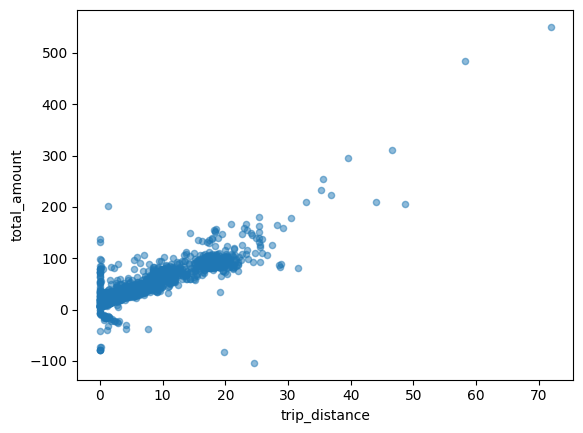

In [27]:
exploration_set.plot(kind='scatter', x='trip_distance', y='total_amount', alpha=0.5)
plt.show()

**We see that there is a linear relationship between the two columns.**

### Visualizing Outliers

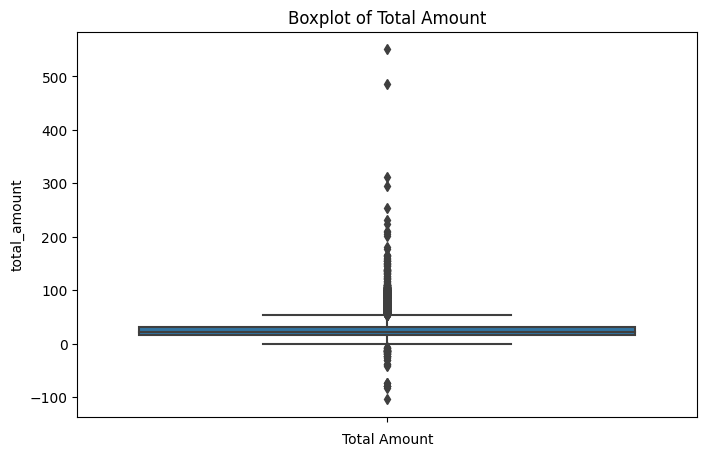

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(y = 'total_amount', data= exploration_set, orient='v')
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

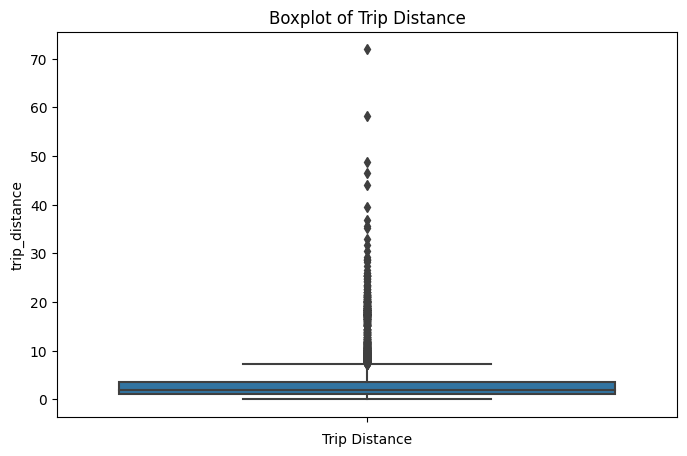

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(y = 'trip_distance', data= exploration_set, orient='v')
plt.title('Boxplot of Trip Distance')
plt.xlabel('Trip Distance')
plt.show()

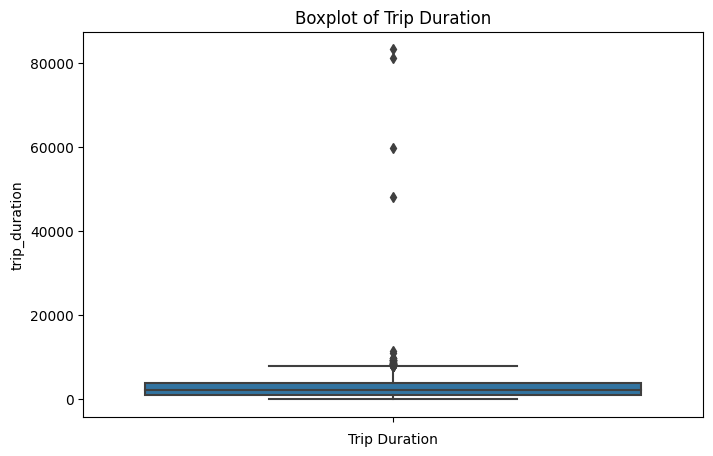

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(y = 'trip_duration', data= exploration_set, orient='v')
plt.title('Boxplot of Trip Duration')
plt.xlabel('Trip Duration')
plt.show()


## Data Preprocessing

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                     object
extra                           float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
trip_duration                   float64
pickup_hour                       int32
pickup_dayofweek                  int32
time_of_day                    category
day_of_week                      object
dtype: object

In [33]:
data['passenger_count'].mean()

1.3576777585053545

In [34]:
imputer_1 = SimpleImputer(strategy="mean")
imputer_1.fit(data[['passenger_count']])

SimpleImputer()

In [35]:
imputer_1.statistics_ 

array([1.35767776])

In [36]:
data['passenger_count'] = imputer_1.transform(data[['passenger_count']])  

In [37]:
imputer_2 = SimpleImputer(strategy = "mean") # For imputing Ratecode ID
imputer_3 = SimpleImputer(strategy = "mean") # For imputing congestion surcharge
imputer_4 = SimpleImputer(strategy = "mean") # For imputing airport fee 

In [38]:
data['RatecodeID'].mean()

1.51830715769907

In [39]:
imputer_2.fit(data[['RatecodeID']])

SimpleImputer()

In [40]:
imputer_2.statistics_

array([1.51830716])

In [41]:
data['RatecodeID'] = imputer_2.transform(data[['RatecodeID']]) 

In [42]:
data['congestion_surcharge'].mean() 

2.246970513192401

In [43]:
imputer_3.fit(data[['congestion_surcharge']])
imputer_3.statistics_ 

array([2.24697051])

In [44]:
data['congestion_surcharge'] = imputer_3.transform(data[['congestion_surcharge']])  

In [45]:
imputer_4.fit(data[['Airport_fee']])
#assert(imputer_4.statistics_[0]==data['Airport_fee'].mode())
data['Airport_fee'] = imputer_4.transform(data[['Airport_fee']])  

In [46]:
mode = data['store_and_fwd_flag'].mode().iloc[0]
print(mode) 

N


In [47]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].fillna(mode)

In [48]:
data['store_and_fwd_flag'].isnull().sum()

0

In [49]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration,pickup_hour,pickup_dayofweek,time_of_day,day_of_week
0,1,2023-06-28 16:34:45,2023-06-28 17:20:21,1.0,2.14,1.0,N,120,9,Credit Card,...,0.0,1.0,20.64,2.5,0.0,2736.0,16,2,Afternoon,Wednesday
1,0,2023-06-29 22:01:35,2023-06-29 23:05:01,1.0,2.70,1.0,N,15,215,Credit Card,...,0.0,1.0,25.55,2.5,0.0,3806.0,22,3,Night,Thursday
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,0.0,1.0,17.64,2.5,0.0,3219.0,10,4,Morning,Friday
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,0.0,1.0,12.80,2.5,0.0,3412.0,13,3,Afternoon,Thursday
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,0.0,1.0,18.00,2.5,0.0,1130.0,22,3,Night,Thursday


In [50]:
data = data.drop(['time_of_day','day_of_week'],axis = 1)

## Encoding Categorical variables


In [51]:
def encode_data(data):
    data = pd.get_dummies(data , prefix = ['store_and_fwd_flag','payment_type'])
    dummy_columns = data.select_dtypes(include=['bool']).columns.tolist()
    data[dummy_columns] = data[dummy_columns].astype(int)
    return data  

In [52]:
data = encode_data(data) 

In [53]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,...,trip_duration,pickup_hour,pickup_dayofweek,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,1,2023-06-28 16:34:45,2023-06-28 17:20:21,1.0,2.14,1.0,120,9,2.5,7.165589,...,2736.0,16,2,1,0,0,1,0,0,0
1,0,2023-06-29 22:01:35,2023-06-29 23:05:01,1.0,2.70,1.0,15,215,3.5,6.067401,...,3806.0,22,3,1,0,0,1,0,0,0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,167,223,0.0,4.111547,...,3219.0,10,4,1,0,0,1,0,0,0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,128,239,2.5,6.411079,...,3412.0,13,3,1,0,0,1,0,0,0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,203,52,1.0,4.769377,...,1130.0,22,3,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:22:22,2023-06-30 22:50:57,3.0,3.45,1.0,147,167,1.0,8.732495,...,1715.0,22,4,1,0,0,1,0,0,0
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,154,191,5.0,0.283275,...,3684.0,13,4,1,0,1,0,0,0,0
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,168,106,2.5,4.245354,...,4202.0,11,3,1,0,0,1,0,0,0
174998,1,2023-06-29 19:08:55,2023-06-29 19:47:17,1.0,4.71,1.0,240,100,2.5,10.479776,...,2302.0,19,3,1,0,0,1,0,0,0


## Scaling Numerical Columns

In [54]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = StandardScaler() 

In [55]:
continuous_columns = ['trip_distance' , 'extra' , 'tolls_amount' , 'trip_duration' , 'improvement_surcharge' , 'congestion_surcharge' , 'Airport_fee']

In [56]:
scaler.fit(data[continuous_columns])

StandardScaler()

In [57]:
data[continuous_columns] = scaler.transform(data[continuous_columns]) 

In [58]:
data.head(10) 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,...,trip_duration,pickup_hour,pickup_dayofweek,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,1,2023-06-28 16:34:45,2023-06-28 17:20:21,1.0,-0.007611,1.0,120,9,0.291434,7.165589,...,0.021906,16,2,1,0,0,1,0,0,0
1,0,2023-06-29 22:01:35,2023-06-29 23:05:01,1.0,-0.006193,1.0,15,215,0.804651,6.067401,...,0.401221,22,3,1,0,0,1,0,0,0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,-0.010117,1.0,167,223,-0.991610,4.111547,...,0.193129,10,4,1,0,0,1,0,0,0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,-0.012016,1.0,128,239,0.291434,6.411079,...,0.261548,13,3,1,0,0,1,0,0,0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,-0.010244,1.0,203,52,-0.478392,4.769377,...,-0.547421,22,3,1,0,0,1,0,0,0
5,0,2023-06-29 16:29:06,2023-06-29 16:31:14,1.0,-0.013029,99.0,225,256,-0.991610,1.507831,...,-0.902630,16,3,1,0,0,1,0,0,0
6,1,2023-06-30 11:52:20,2023-06-30 12:54:57,1.0,-0.009661,1.0,214,240,-0.991610,0.094334,...,0.383850,11,4,1,0,1,0,0,0,0
7,1,2023-06-30 17:16:44,2023-06-30 17:40:34,1.0,-0.011889,1.0,176,227,0.291434,0.727105,...,-0.441071,17,4,1,0,1,0,0,0,0
8,0,2023-06-30 21:52:44,2023-06-30 21:54:13,3.0,-0.003408,1.0,196,139,0.804651,6.590745,...,-0.916455,21,4,1,0,0,1,0,0,0
9,1,2023-06-29 09:39:24,2023-06-29 11:12:12,1.0,-0.006699,1.0,138,196,-0.991610,6.091603,...,1.025850,9,3,1,0,0,1,0,0,0


In [59]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'trip_duration', 'pickup_hour', 'pickup_dayofweek',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'payment_type_Cash',
       'payment_type_Credit Card', 'payment_type_UPI', 'payment_type_Wallet',
       'payment_type_unknown'],
      dtype='object')

## Preparing Data for Model Training

In [60]:
def prepare_data(data):
    columns_to_train = ['RatecodeID','passenger_count' , 'trip_distance' , 'PULocationID','DOLocationID',
                        'extra' , 'tolls_amount' , 'improvement_surcharge' , 'congestion_surcharge' ,
                        'Airport_fee','pickup_hour','trip_duration','pickup_dayofweek','store_and_fwd_flag_N', 
                        'store_and_fwd_flag_Y','payment_type_Cash','payment_type_Credit Card', 'payment_type_UPI',
                        'payment_type_Wallet','payment_type_unknown']
    label = data['total_amount'].copy()
    data = data[columns_to_train]
    return data , label

In [61]:
(data , label) = prepare_data(data)

In [62]:
data.head(10)

,RatecodeID,passenger_count,trip_distance,PULocationID,DOLocationID,extra,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,pickup_hour,trip_duration,pickup_dayofweek,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,1.0,1.0,-0.007611,120,9,0.291434,-0.27781,0.102183,0.314375,-0.315757,16,0.021906,2,1,0,0,1,0,0,0
1,1.0,1.0,-0.006193,15,215,0.804651,-0.27781,0.102183,0.314375,-0.315757,22,0.401221,3,1,0,0,1,0,0,0
2,1.0,1.0,-0.010117,167,223,-0.991610,-0.27781,0.102183,0.314375,-0.315757,10,0.193129,4,1,0,0,1,0,0,0
3,1.0,1.0,-0.012016,128,239,0.291434,-0.27781,0.102183,0.314375,-0.315757,13,0.261548,3,1,0,0,1,0,0,0
4,1.0,3.0,-0.010244,203,52,-0.478392,-0.27781,0.102183,0.314375,-0.315757,22,-0.547421,3,1,0,0,1,0,0,0
5,99.0,1.0,-0.013029,225,256,-0.991610,-0.27781,0.102183,-2.791738,-0.315757,16,-0.902630,3,1,0,0,1,0,0,0
6,1.0,1.0,-0.009661,214,240,-0.991610,-0.27781,0.102183,0.314375,-0.315757,11,0.383850,4,1,0,1,0,0,0,0
7,1.0,1.0,-0.011889,176,227,0.291434,-0.27781,0.102183,0.314375,-0.315757,17,-0.441071,4,1,0,1,0,0,0,0
8,1.0,3.0,-0.003408,196,139,0.804651,-0.27781,0.102183,0.314375,-0.315757,21,-0.916455,4,1,0,0,1,0,0,0
9,1.0,1.0,-0.006699,138,196,-0.991610,-0.27781,0.102183,0.314375,-0.315757,9,1.025850,3,1,0,0,1,0,0,0


In [63]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(data , label , test_size = 0.2, random_state = 43)
print("Shape of trianing data:", X_train.shape)
print("Shape of test data:", X_test.shape)
print("Shape of trianing label:", y_train.shape)
print("Shape of test label:", y_test.shape)

Shape of trianing data: (140000, 20)
Shape of test data: (35000, 20)
Shape of trianing label: (140000,)
Shape of test label: (35000,)


## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train , y_train)

LinearRegression()

In [65]:
from sklearn.metrics import mean_squared_error , r2_score
y_pred = linear_regression.predict(X_train)
print(mean_squared_error(y_train ,y_pred ))

249.23731642847406


In [66]:
linear_regression.score(X_train , y_train)

0.6154795389158025

In [67]:
linear_regression.score(X_test , y_test)

0.6428379856902839

In [68]:
y_hat = linear_regression.predict(X_test)
r2 = r2_score(y_test , y_hat)
print(r2)

0.6428379856902839


## Gradient Boosting

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
pipeline = Pipeline(steps = [('gradient_boosting_regressor',GradientBoostingRegressor())])

In [70]:
pipeline.fit(X_train , y_train)

Pipeline(steps=[('gradient_boosting_regressor', GradientBoostingRegressor())])

In [71]:
train_predictions = pipeline.predict(X_train)
print(r2_score(train_predictions , y_train))

0.9123992559905341


In [72]:
test_predictions = pipeline.predict(X_test)
print(r2_score(test_predictions , y_test))

0.9266849496789336


In [73]:
param_grid = {
    'gradient_boosting_regressor__n_estimators': np.arange(50, 150, 10),  
    'gradient_boosting_regressor__learning_rate': np.logspace(-3, -1, 50), 
    'gradient_boosting_regressor__max_depth': np.arange(3,10,1),  
    'gradient_boosting_regressor__min_samples_split': np.arange(2, 6, 1),   
    'gradient_boosting_regressor__min_samples_leaf': np.arange(1, 6, 1), 
} 

In [74]:
param_dist = {
    'gradient_boosting_regressor__n_estimators': [50 , 100 , 150 , 200],  
    'gradient_boosting_regressor__learning_rate': [0.01 , 0.1 , 0.2], 
    'gradient_boosting_regressor__max_depth': [3,5,7],  
    'gradient_boosting_regressor__min_samples_split': [2,5,10],   
    'gradient_boosting_regressor__min_samples_leaf': [1,2,4], 
}

In [75]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline,param_dist,n_iter=20,scoring='r2',cv=5,n_jobs=-1,random_state=42)
random_search.fit(X_train , y_train)    

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('gradient_boosting_regressor',
                                              GradientBoostingRegressor())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'gradient_boosting_regressor__learning_rate': [0.01,
                                                                                       0.1,
                                                                                       0.2],
                                        'gradient_boosting_regressor__max_depth': [3,
                                                                                   5,
                                                                                   7],
                                        'gradient_boosting_regressor__min_samples_leaf': [1,
                                                                                          2,
                                                                                          4],
                                        'gradient_boosting_regressor__min_samples_split': [2,
                                                                                           5,
                                                                                           10],
                                        'gradient_boosting_regressor__n_estimators': [50,
                                                                                      100,
                                                                                      150,
                                                                                      200]},
                   random_state=42, scoring='r2')

In [76]:
best_boosting_regressor = random_search.best_estimator_
print(best_boosting_regressor)

Pipeline(steps=[('gradient_boosting_regressor',
                 GradientBoostingRegressor(learning_rate=0.2,
                                           min_samples_split=10,
                                           n_estimators=150))])


In [77]:
print(random_search.best_score_) 

0.9096084174526947


In [78]:
y_test_hat = best_boosting_regressor.predict(X_test)
print(r2_score(y_test , y_test_hat))  

0.936901319465381


In [79]:
best_boosting_regressor

Pipeline(steps=[('gradient_boosting_regressor',
                 GradientBoostingRegressor(learning_rate=0.2,
                                           min_samples_split=10,
                                           n_estimators=150))])

## Random Forest Regressor

In [80]:
# from sklearn.ensemble import RandomForestRegressor
# random_forest_regressor = RandomForestRegressor(random_state = 42) 

In [81]:
# random_forest_regressor.fit(X_train , y_train) 

In [82]:
# y_hat = random_forest_regressor.predict(X_train)
# print(r2_score(y_hat,y_train)) 

In [83]:
# y_hat_test = random_forest_regressor.predict(X_test)
# print(r2_score(y_hat_test , y_test))

In [84]:
# from sklearn.model_selection import RandomizedSearchCV
# param_grid = {
#     'n_estimators': [50,100,150,200],
#     'max_features':['sqrt','log2'],
#     'max_depth':[None,10,20,30,40,50],
#     'min_samples_split': [2,5,10],
#     'min_samples_leaf': [1,2,4]
# }
# randomized_search = RandomizedSearchCV(random_forest_regressor , param_grid , n_iter = 10,
#                                        cv=5,random_state = 42 ,n_jobs =-1 ,scoring = 'r2')
# randomized_search.fit(X_train , y_train)    

In [85]:
# best_params = randomized_search.best_params_
# print(best_params)  

In [86]:
# best_score = randomized_search.best_score_
# print(best_score) 

In [87]:
# randomized_search.cv_results_ 

In [88]:
# best_random_forest_regressor = randomized_search.best_estimator_
# print(best_random_forest_regressor)  

In [89]:
# y_best_test = best_random_forest_regressor.predict(X_test)
# print(r2_score(y_test ,y_best_test )) 

## XGBoost Regression

In [90]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

In [91]:
xgb_regressor.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [92]:
train_predictions_xgb = xgb_regressor.predict(X_train)
print(r2_score(train_predictions_xgb , y_train))

0.9634437939558567


In [93]:
test_predictions_xgb = xgb_regressor.predict(X_test)
print(r2_score(test_predictions_xgb , y_test)) 

0.9356404362150552


In [94]:
param_dist = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2]
} 

In [95]:
random_search = RandomizedSearchCV(
    estimator= xgb_regressor ,
    param_distributions=param_dist,
    n_iter=10,  
    cv=3,
    scoring='r2',
    random_state=42
)

random_search.fit(X_train, y_train) 

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 2],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [5, 10, 15],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2')

In [96]:
best_xgb_regressor = random_search.best_estimator_ 

In [97]:
train_predictions_xgb = best_xgb_regressor.predict(X_train)
print(r2_score(train_predictions_xgb , y_train)) 

0.9353710210160917


In [98]:
test_predictions_xgb = best_xgb_regressor.predict(X_test)
print(r2_score(test_predictions_xgb , y_test)) 

0.9383508270148726


## Lasso Regression

In [99]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)

In [100]:
lasso.fit(X_train , y_train) 

Lasso()

In [101]:
train_predictions = lasso.predict(X_train) 
print(r2_score(train_predictions , y_train)) 

0.23287352507796277


In [102]:
test_predictions = lasso.predict(X_test)
print(r2_score(test_predictions , y_test))

0.3465190025187065


In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha'] 

In [104]:
best_lasso = grid_search.best_estimator_
final_predictions = best_lasso.predict(X_test)
print(r2_score(final_predictions , y_test))


0.45466639684741084


## Ridge Regression 


In [105]:
from sklearn.linear_model import Ridge
ridge = Ridge() 

In [106]:
ridge.fit(X_train , y_train) 

Ridge()

In [107]:
ridge_train_predictions = ridge.predict(X_train)
print(r2_score(ridge_train_predictions,y_train)) 


0.3752431047779541


In [108]:
ridge_test_predictions = ridge.predict(X_test)
print(r2_score(ridge_test_predictions,y_test)) 

0.4666551374643746


In [109]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.1,1.0,10.0]
}
grid_search = GridSearchCV(ridge , param_grid , cv = 5, n_jobs = -1,return_train_score = True)
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0]}, return_train_score=True)

In [110]:
grid_search.best_params_

{'alpha': 10.0}

In [111]:
best_ridge = grid_search.best_estimator_
best_train_ridge_predictions = best_ridge.predict(X_train)
print(r2_score(best_train_ridge_predictions , y_train))

0.3751755046751313


In [112]:
best_test_ridge_predictions = best_ridge.predict(X_test)
print(r2_score(best_test_ridge_predictions , y_test))

0.46659995402877696


## Comparing performance of Models

In [113]:
models = ['Random Forest Regressor' , 'Gradient Boost' , 'XGBoost']

**We compare the performance based on the R2 scores**

In [114]:
training_scores = []

## 

## Making Predictions on Actual Test Data

In [115]:
Data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [116]:
Data.head(10) 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
5,0,2023-06-28 21:14:18,2023-06-28 20:41:25,1.0,0.50,1.0,N,194,154,Credit Card,3.5,6.812990,0.0,1.0,2.5,0.00
6,1,2023-06-29 13:36:18,2023-06-29 13:38:40,2.0,21.59,4.0,N,163,26,Credit Card,0.0,3.488711,0.0,1.0,0.0,1.75
7,1,2023-06-30 21:23:51,2023-06-30 22:52:18,1.0,2.48,1.0,N,146,192,Credit Card,1.0,6.146135,0.0,1.0,2.5,0.00
8,1,2023-06-28 23:48:47,2023-06-28 22:32:51,1.0,1.22,1.0,N,45,232,Credit Card,1.0,5.574140,0.0,1.0,2.5,0.00
9,1,2023-06-30 15:43:47,2023-06-30 16:00:15,1.0,1.04,1.0,N,254,238,Cash,0.0,2.988596,0.0,1.0,2.5,0.00


In [117]:
Data['tpep_pickup_datetime'] = pd.to_datetime(Data['tpep_pickup_datetime'])
Data['tpep_dropoff_datetime'] = pd.to_datetime(Data['tpep_dropoff_datetime'])
# swapping values if pickup datetime is later than dropoff datetime
mask = Data['tpep_pickup_datetime'] > Data['tpep_dropoff_datetime']
Data.loc[mask,['tpep_pickup_datetime','tpep_dropoff_datetime']] = Data.loc[mask,['tpep_dropoff_datetime','tpep_pickup_datetime']].values
# Calculating trip duration
Data['trip_duration'] = (Data['tpep_dropoff_datetime']-Data['tpep_pickup_datetime']).dt.total_seconds()
# Extracting pickup hour and pick up day of week from tpep_pickup_datetime
Data['pickup_hour'] = Data['tpep_pickup_datetime'].dt.hour
Data['pickup_dayofweek'] = Data['tpep_pickup_datetime'].dt.dayofweek
Data['passenger_count'] = imputer_1.transform(Data[['passenger_count']])
Data['RatecodeID'] = imputer_2.transform(Data[['RatecodeID']])
Data['congestion_surcharge'] = imputer_3.transform(Data[['congestion_surcharge']])
Data['Airport_fee'] = imputer_4.transform(Data[['Airport_fee']])
Data = encode_data(Data)
Data[continuous_columns] = scaler.transform(Data[continuous_columns]) 

In [118]:
columns_to_train = ['RatecodeID','passenger_count' , 'trip_distance' , 'PULocationID','DOLocationID',
                        'extra' , 'tolls_amount' , 'improvement_surcharge' , 'congestion_surcharge' ,
                        'Airport_fee','pickup_hour','trip_duration','pickup_dayofweek','store_and_fwd_flag_N', 
                        'store_and_fwd_flag_Y','payment_type_Cash','payment_type_Credit Card', 'payment_type_UPI',
                        'payment_type_Wallet','payment_type_unknown']
Data = Data[columns_to_train]   

In [119]:
Data

,RatecodeID,passenger_count,trip_distance,PULocationID,DOLocationID,extra,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,pickup_hour,trip_duration,pickup_dayofweek,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,1.0,1.0,-0.000496,20,3,-0.478392,-0.27781,0.102183,0.314375,-0.315757,0,-0.862926,3,1,0,0,1,0,0,0
1,1.0,1.0,-0.007712,9,81,0.291434,-0.27781,0.102183,0.314375,-0.315757,17,-0.767211,4,1,0,0,1,0,0,0
2,1.0,1.0,-0.010623,92,90,0.291434,-0.27781,0.102183,0.314375,-0.315757,18,0.471412,3,1,0,1,0,0,0,0
3,1.0,1.0,-0.011003,19,102,0.804651,-0.27781,0.102183,0.314375,-0.315757,21,-0.683194,4,1,0,0,1,0,0,0
4,1.0,1.0,-0.002876,131,229,-0.991610,-0.27781,0.102183,-2.791738,-0.315757,14,-0.344292,3,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,1.0,-0.011484,48,72,0.291434,-0.27781,0.102183,0.314375,-0.315757,17,0.086071,3,1,0,0,1,0,0,0
49996,1.0,1.0,-0.000319,57,103,-0.478392,-0.27781,0.102183,-2.791738,3.163375,1,-0.634273,4,1,0,1,0,0,0,0
49997,1.0,1.0,-0.008168,150,78,-0.478392,-0.27781,0.102183,0.314375,-0.315757,21,-0.115994,4,1,0,0,1,0,0,0
49998,1.0,1.0,0.000643,4,154,0.804651,-0.27781,0.102183,0.314375,-0.315757,2,-0.379033,4,1,0,0,1,0,0,0


In [120]:
y_test_hat = best_xgb_regressor.predict(Data)   

In [121]:
submission = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv')
submission.head()

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489


In [122]:
submission1 = pd.DataFrame(columns = ["ID" , "total_amount"])
submission1["ID"] = [i for i in range(1,len(y_test_hat)+1)]
submission1["total_amount"] = y_test_hat
submission1.to_csv("submission.csv", index = False)


In [123]:
submission1

,ID,total_amount
0,1,34.401711
1,2,24.346893
2,3,15.603233
3,4,15.163310
4,5,26.109003
...,...,...
49995,49996,16.641815
49996,49997,27.328081
49997,49998,20.823648
49998,49999,35.147724
